In [222]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests

from matplotlib import pyplot as plt

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [199]:
df = pd.read_csv('data/neighborhoods.csv')
df.columns=['Airbnb','Neighborhood','NTA','Longitude','Latitude']
df

,Airbnb,Neighborhood,NTA,Longitude,Latitude
0,"Allerton,Pelham Gardens",1,"BX31,BX07",-73.853921,40.865872
1,Arden Heights,2,SI48,-74.189938,40.550339
2,Astoria,3,"QN71,QN70",-73.920299,40.765092
3,Bath Beach,4,BK27,-74.010615,40.603978
4,"Battery Park City,Financial District",5,MN25,-74.009726,40.709304
5,Bay Terrace,6,QN47,-73.787994,40.785245
6,Bayside,7,QN46,-73.771676,40.761234
7,"Bayswater,Far Rockaway",8,QN15,-73.754245,40.602593
8,Bedford-Stuyvesant,9,"BK75,BK35",-73.940198,40.691138
9,Bellerose,10,QN43,-73.727896,40.736472


In [168]:
# foursquare info
CLIENT_ID = '4I1S24XICRSSXIBQIMGE3S1CXGICUJFSF3HYIVQXMU5I2QL0'
CLIENT_SECRET = 'ZSSYKS3PQW4UNEMEUYUEVY1D3A1X2MDCGAUWAXFBFKKMYCGV'
VERSION = '20191207' # Foursquare API version
LIMIT = 1000
sortByPopularity = 1

In [167]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&sortByPopularity={}'.format(
            CLIENT_ID, CLIENT_SECRET, 
            VERSION, lat, lng, LIMIT, sortByPopularity)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [169]:
all_nearby = pd.DataFrame(columns = ['Neighborhood','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

In [174]:
for i in range(99,147):
    nearby = getNearbyVenues(names=[df['Unique Identifier'][i]],
                                   latitudes=[df['Latitude'][i]],
                                   longitudes=[df['Longitude'][i]]
                                  )
    all_nearby = all_nearby.append(nearby)
all_nearby

KeyError: 147

In [178]:
all_nearby

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,The Home Depot,40.861943,-73.832648,Hardware Store
1,1,Au Bon Pain,40.856463,-73.847383,Bakery
2,1,Starbucks,40.851371,-73.844087,Coffee Shop
3,1,Planet Fitness,40.863298,-73.835568,Gym / Fitness Center
4,1,Dunkin',40.867800,-73.833365,Donut Shop
5,1,CVS pharmacy,40.852887,-73.853041,Pharmacy
6,1,Blink Gunhill,40.878787,-73.865427,Gym
7,1,McDonald's,40.864027,-73.867063,Fast Food Restaurant
8,1,Walgreens,40.878891,-73.844059,Pharmacy
9,1,Crunch,40.872635,-73.874847,Gym / Fitness Center


In [185]:
# one hot encoding
onehot = pd.get_dummies(all_nearby[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = all_nearby['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0


In [183]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [189]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # append 'st', 'nd', 'rd' to the top 3 venues
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Donut Shop,Pharmacy,Pizza Place,Fast Food Restaurant,Bank,Supermarket,Caribbean Restaurant,Park,Gym / Fitness Center,Coffee Shop
1,2,Pharmacy,Donut Shop,Coffee Shop,Pizza Place,Train Station,Burger Joint,Bank,Ice Cream Shop,Park,Italian Restaurant
2,3,Bar,Bagel Shop,Pub,Coffee Shop,Greek Restaurant,Gym,Grocery Store,Pizza Place,Cocktail Bar,Donut Shop
3,4,Bakery,Pizza Place,Italian Restaurant,Bagel Shop,Sushi Restaurant,Chinese Restaurant,Coffee Shop,Diner,Liquor Store,Bank
4,5,Coffee Shop,Hotel,Gym,Park,Memorial Site,Pizza Place,Department Store,Café,Sandwich Place,Bar


In [209]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 10
grouped_clustering = grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters).fit(grouped_clustering)

In [210]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,1,Donut Shop,Pharmacy,Pizza Place,Fast Food Restaurant,Bank,Supermarket,Caribbean Restaurant,Park,Gym / Fitness Center,Coffee Shop
1,2,2,Pharmacy,Donut Shop,Coffee Shop,Pizza Place,Train Station,Burger Joint,Bank,Ice Cream Shop,Park,Italian Restaurant
2,1,3,Bar,Bagel Shop,Pub,Coffee Shop,Greek Restaurant,Gym,Grocery Store,Pizza Place,Cocktail Bar,Donut Shop
3,2,4,Bakery,Pizza Place,Italian Restaurant,Bagel Shop,Sushi Restaurant,Chinese Restaurant,Coffee Shop,Diner,Liquor Store,Bank
4,3,5,Coffee Shop,Hotel,Gym,Park,Memorial Site,Pizza Place,Department Store,Café,Sandwich Place,Bar
5,2,6,Deli / Bodega,Bagel Shop,Cosmetics Shop,Pizza Place,Donut Shop,Pharmacy,Park,Bakery,Ice Cream Shop,Italian Restaurant
6,2,7,Korean Restaurant,Italian Restaurant,Coffee Shop,Donut Shop,Bakery,Diner,Pharmacy,Greek Restaurant,Café,American Restaurant
7,4,8,Beach,Bagel Shop,Supermarket,Pizza Place,Golf Course,Coffee Shop,Chinese Restaurant,Airport Lounge,Donut Shop,Pharmacy
8,1,9,Bar,Pizza Place,Coffee Shop,Deli / Bodega,Playground,Bagel Shop,Grocery Store,Cocktail Bar,Mexican Restaurant,Café
9,2,10,Pizza Place,Bank,Pharmacy,Park,Italian Restaurant,Indian Restaurant,Bakery,Ice Cream Shop,Discount Store,Donut Shop


In [218]:
neighborhoods_venues_sorted.insert(0, 'kmean', kmeans.labels_)

merged = df
merged = merged.merge(neighborhoods_venues_sorted, on = 'Neighborhood')

merged.head()

,Airbnb,Neighborhood,NTA,Longitude,Latitude,kmean,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Allerton,Pelham Gardens",1,"BX31,BX07",-73.853921,40.865872,4,0,Donut Shop,Pharmacy,Pizza Place,Fast Food Restaurant,Bank,Supermarket,Caribbean Restaurant,Park,Gym / Fitness Center,Coffee Shop
1,Arden Heights,2,SI48,-74.189938,40.550339,1,2,Pharmacy,Donut Shop,Coffee Shop,Pizza Place,Train Station,Burger Joint,Bank,Ice Cream Shop,Park,Italian Restaurant
2,Astoria,3,"QN71,QN70",-73.920299,40.765092,2,1,Bar,Bagel Shop,Pub,Coffee Shop,Greek Restaurant,Gym,Grocery Store,Pizza Place,Cocktail Bar,Donut Shop
3,Bath Beach,4,BK27,-74.010615,40.603978,0,2,Bakery,Pizza Place,Italian Restaurant,Bagel Shop,Sushi Restaurant,Chinese Restaurant,Coffee Shop,Diner,Liquor Store,Bank
4,"Battery Park City,Financial District",5,MN25,-74.009726,40.709304,6,3,Coffee Shop,Hotel,Gym,Park,Memorial Site,Pizza Place,Department Store,Café,Sandwich Place,Bar


In [219]:
nyc = gpd.read_file('data/geojson/combinedneighborhoods.geojson')
nyc = nyc[['Unique Identifier','geometry']]
nyc.columns=['neighborhood_id','geometry']
nyc.head()

,neighborhood_id,geometry
0,1,POLYGON ((-73.85663664103342 40.85811529295128...
1,2,POLYGON ((-74.17185166456856 40.56152092302123...
2,3,POLYGON ((-73.90202516499477 40.76741678384665...
3,4,POLYGON ((-74.00200394611576 40.59413237177825...
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...


In [220]:
merged_nyc = nyc.merge(merged,left_on='neighborhood_id',right_on='Neighborhood')
merged_nyc.head()

,neighborhood_id,geometry,Airbnb,Neighborhood,NTA,Longitude,Latitude,kmean,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,"Allerton,Pelham Gardens",1,"BX31,BX07",-73.853921,40.865872,4,0,Donut Shop,Pharmacy,Pizza Place,Fast Food Restaurant,Bank,Supermarket,Caribbean Restaurant,Park,Gym / Fitness Center,Coffee Shop
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,Arden Heights,2,SI48,-74.189938,40.550339,1,2,Pharmacy,Donut Shop,Coffee Shop,Pizza Place,Train Station,Burger Joint,Bank,Ice Cream Shop,Park,Italian Restaurant
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,Astoria,3,"QN71,QN70",-73.920299,40.765092,2,1,Bar,Bagel Shop,Pub,Coffee Shop,Greek Restaurant,Gym,Grocery Store,Pizza Place,Cocktail Bar,Donut Shop
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,Bath Beach,4,BK27,-74.010615,40.603978,0,2,Bakery,Pizza Place,Italian Restaurant,Bagel Shop,Sushi Restaurant,Chinese Restaurant,Coffee Shop,Diner,Liquor Store,Bank
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,"Battery Park City,Financial District",5,MN25,-74.009726,40.709304,6,3,Coffee Shop,Hotel,Gym,Park,Memorial Site,Pizza Place,Department Store,Café,Sandwich Place,Bar


/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


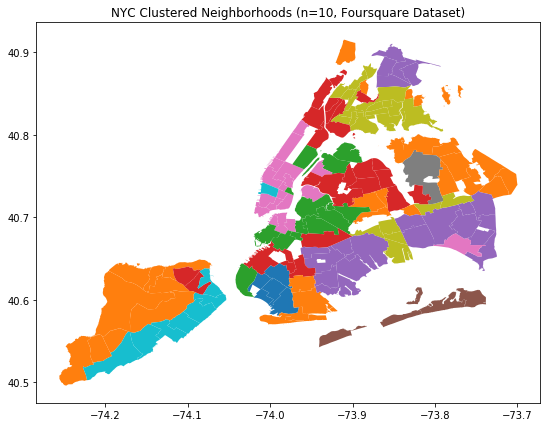

In [225]:
merged_nyc.plot(column='kmean',colormap='tab10',figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=10, Foursquare Dataset)')
plt.savefig('images/map_foursquare.png')